<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def m_v_std(l):
  total = 0
  mean = 0
  var = 0
  std = 0
  
  for item in l:
    total += item 
    mean = total/(len(l))
    
  var = sum((item-mean)**2 for item in l)/(len(l))
  std = var**(1/2)
    
  return print('Mean:', mean, '\nVariance:', var, '\nStandard Deviation:', std)

In [42]:
m_v_std(sales)

Mean: 3052.714285714286 
Variance: 183761.06122448976 
Standard Deviation: 428.67360686714756


In [43]:
# Checking if my work is correct
print('Mean:', np.mean(sales))
print('Variance:', np.var(sales))
print('Standard Deviation:', np.std(sales))

Mean: 3052.714285714286
Variance: 183761.06122448976
Standard Deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [49]:
print('Covariance:\n', np.cov(sales, customers))

Covariance:
 [[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [65]:
print('Standard Deviation for Sales:', np.std(sales))
print('Standard Deviation for Customers:', np.std(customers))

Standard Deviation for Sales: 428.67360686714756
Standard Deviation for Customers: 15.792015549069118


In [66]:
print('Correlation Coefficient:', np.corrcoef((np.std(sales), np.std(customers))))

Correlation Coefficient: 1.0


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [68]:
ttd = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(ttd.shape)
ttd.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [77]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
Unnamed: 0          1310 non-null int64
pclass              1309 non-null float64
survived            1309 non-null float64
name                1309 non-null object
sex                 1309 non-null object
age                 1310 non-null float64
sibsp               1309 non-null float64
parch               1309 non-null float64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1310 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
has_cabin_number    1310 non-null int64
dtypes: float64(7), int64(2), object(7)
memory usage: 163.8+ KB


In [88]:
ttdnc = ttd[['Unnamed: 0', 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number']]
print(ttdnc.shape)
ttdnc.head()

(1310, 9)


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [85]:
ttdnc.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [86]:
np.var(ttdnc)

Unnamed: 0          143008.250000
pclass                   0.701433
survived                 0.236069
age                    165.723418
sibsp                    1.084223
parch                    0.748622
fare                  2676.911604
body                  9465.806844
has_cabin_number         0.174480
dtype: float64

In [90]:
np.cov(ttdnc.drop(columns=['body']))

array([[  5435.13388114,   3879.82548373,   3879.5868192 , ...,
         -5352.1715346 ,  -5340.04433594,             nan],
       [  3879.82548373,   2823.0782304 ,   2820.25878241, ...,
         -3320.61105906,  -3316.44992076,             nan],
       [  3879.5868192 ,   2820.25878241,   2817.87174107, ...,
         -3155.59837054,  -3151.05546875,             nan],
       ...,
       [ -5352.1715346 ,  -3320.61105906,  -3155.59837054, ...,
        212207.20186384, 212314.76434152,             nan],
       [ -5340.04433594,  -3316.44992076,  -3151.05546875, ...,
        212314.76434152, 212422.86356027,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [92]:
np.corrcoef(ttdnc.drop(columns=['body']))

array([[ 1.        ,  0.99047977,  0.99133341, ..., -0.15759587,
        -0.15715895,         nan],
       [ 0.99047977,  1.        ,  0.99992377, ..., -0.13566771,
        -0.1354289 ,         nan],
       [ 0.99133341,  0.99992377,  1.        , ..., -0.12904496,
        -0.12879376,         nan],
       ...,
       [-0.15759587, -0.13566771, -0.12904496, ...,  1.        ,
         0.99999886,         nan],
       [-0.15715895, -0.1354289 , -0.12879376, ...,  0.99999886,
         1.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Dot Product = 0.0


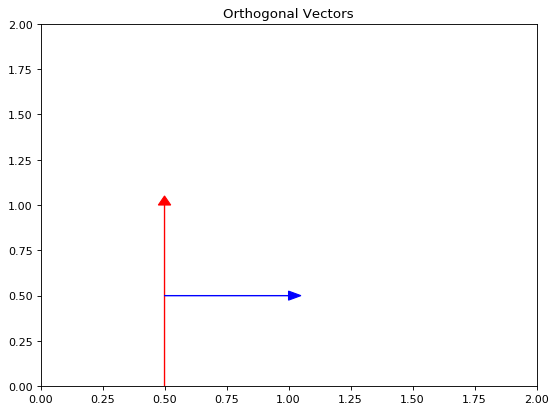

In [193]:
#perpendicular vectors
red = np.array([0, 1])
blue = np.array([.5, 0])
# when dot product = 0 its orthogonal
print('Dot Product =', np.dot(red, blue))

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.arrow(.5,0, red[0], red[1], head_width=.05, head_length=.05, color='red')
plt.arrow(.5,.5, blue[0], blue[1], head_width=.05, head_length=.05, color='blue')

plt.xlim(0,2)
plt.ylim(0,2)
plt.title('Orthogonal Vectors')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [202]:
a = np.array([[-5], [3], [7]])
b = np.array([[6], [-8], [2]])

# Dot product need to == 0 to be orthogonal
print('Dot Product:\n', np.dot(a.T, b), "therefore it's not orthogonal")

Dot Product:
 [[-40]] therefore it's not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [138]:
c = np.array([2, -15, 6, 20])

print((np.linalg.norm(c))**2)
print(np.dot(c, c))
print(np.dot(c.T, c))
print('They all have the same result ')

665.0
665
665
They all have the same result 


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
=7\begin{bmatrix} 1\\ 0 \end{bmatrix}
+12\begin{bmatrix} 0\\ 1 \end{bmatrix}
=7i + 12j
\qquad
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix}
=2\begin{bmatrix} 1\\ 0\\0 \end{bmatrix}
+11\begin{bmatrix} 0\\ 1 \\0\end{bmatrix}
+-8\begin{bmatrix} 0\\ 0 \\1\end{bmatrix}
=2i + 11j + -8j
\qquad 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [142]:
f = np.array([4, 12, 11, 9, 2])

np.linalg.norm(f)

19.131126469708992

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

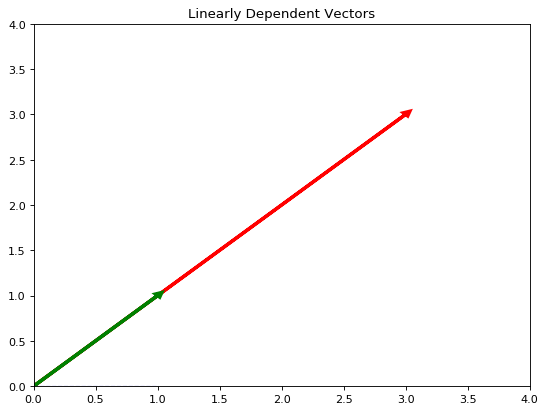

In [153]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Original Vector
v = [1,1] 

# Scaled Vectors
v2 = np.multiply(3, v)

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
# Axis Bounds
plt.xlim(0,4)          
plt.ylim(0,4)
plt.show() 


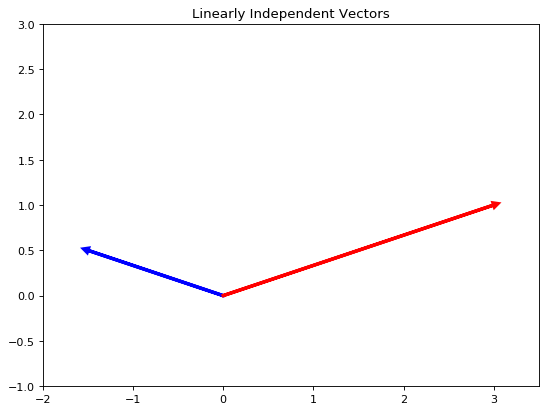

In [146]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [159]:
g = np.array([1, 2])
h = np.array([4, 8])

NV = g+h
NV

array([ 5, 10])

\begin{align}
x\begin{bmatrix} 1 & 2 \end{bmatrix}
+y\begin{bmatrix} 4&8\end{bmatrix}=new vector
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [160]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

NV1 = l+m+n
NV1

array([ 4, 10, 12])

\begin{align}
x\begin{bmatrix} 1 & 2&3 \end{bmatrix}
+y\begin{bmatrix} -1&0&7\end{bmatrix}
+z\begin{bmatrix} 4 & 8&2 \end{bmatrix}
=new vector
\qquad
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



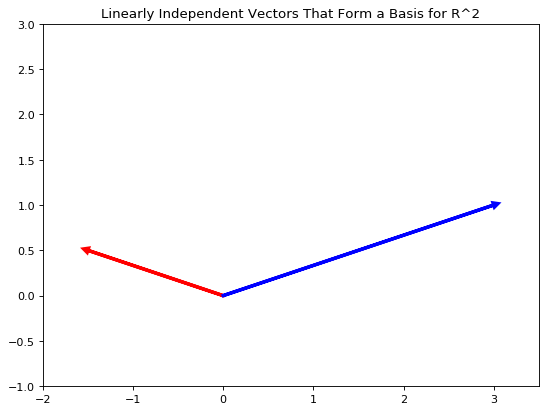

In [209]:
# Plot two vectors that form a basis for R^2

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Independent Vectors That Form a Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

Two vectors are linearly independent and span that space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [204]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It's the max number of linearly independent column or row vectors in the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

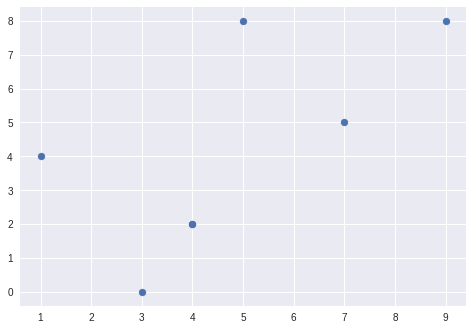

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()